C:\Users\msharova\AppData\Local\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\msharova\AppData\Local\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[[30338 13401]
 [ 1428  5569]]


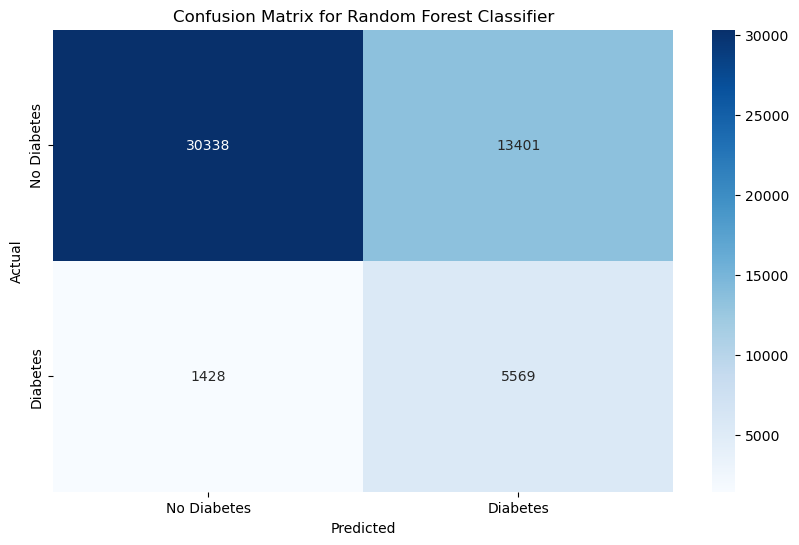

Classification Report for Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     43739
           1       0.29      0.80      0.43      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.75     50736

Specificity:         69.39999999999999 

Sensitivity:         79.60000000000001 (Recall)


In [5]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
import sys 
from scipy import stats 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized

# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

clf = BalancedRandomForestClassifier(criterion='log_loss',bootstrap=True,random_state=42)
clf.fit(X_train, np.ravel(y_train,order='C'))

y_pred = clf.predict(X_test)

metrics['accuracy'].append(accuracy_score(y_test, y_pred))
metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

# Plot confusion matrix for each learning rate
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for each learning rate
print(f'Classification Report for Random Forest Classifier):\n{classification_report(y_test, y_pred)}')
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")